In [1]:
#interactive plotting in separate window
%matplotlib qt 
#%matplotlib inline 

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-gfrances'
failed to get the current screen resources
QXcbConnection: XCB error: 170 (Unknown), sequence: 170, resource id: 90, major code: 146 (Unknown), minor code: 20


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

In [2]:
#reading data
data_df = pd.read_csv('data/E76T1p6sub_map_E=minus15-68_q=0-12.txt', comment = "#")

In [3]:
from modules.Sub_functions import readMap, Qcut, PhononMask

In [4]:
Q_arr, E_arr, S_arr = readMap(data_df)

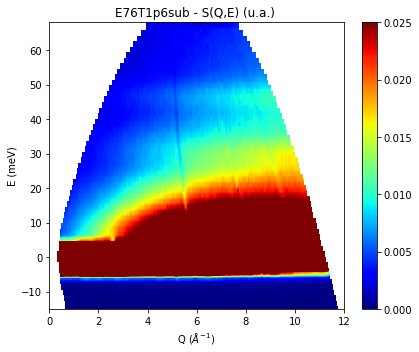

In [10]:
#plotting
x= Q_arr
y= E_arr
z = S_arr
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)

fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,12,-15,68], vmin=0,vmax = 0.025, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E76T1p6sub - S(Q,E) (u.a.) ')
plt.tight_layout()
plt.show()
fig.savefig("./figures/E76T1p6sub.png")

In [8]:
S_int, ratio = Qcut(Q_arr, E_arr, S_arr, 7, 0.8, 5, 66)

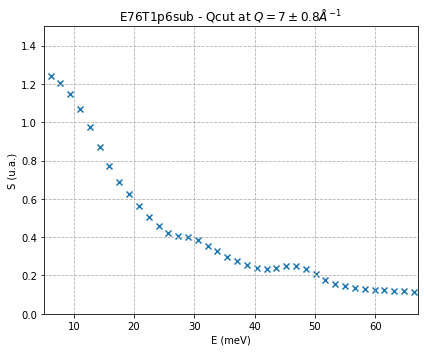

In [9]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('E76T1p6sub - Qcut at $Q = 7 \pm 0.8 \AA ^{-1}$')  
plt.ylabel('S (u.a.)')
plt.xlabel('E (meV)')
plt.scatter(E_arr, S_int, marker = 'x')
plt.xlim([5.1,67])
plt.ylim([0,1.5])
plt.tight_layout()
plt.show()
fig.savefig("./figures/E76T1p6sub_Qcut.png")

In [10]:
from modules.fitQ import fitQdistrib, fit_func

In [11]:
#reading data
mantid_df = pd.read_csv('data/cut_E76T1p6sub_E_29_dE_5.dat')
mantid_df = mantid_df.dropna()

In [12]:
popt_29, pcov_29, Q_arr_29, S_arr_29, S_err_29, Q_ex_29, S_ex_29, Q_fit_29, res_29, S_err_fit_29 = fitQdistrib(mantid_df, 2, 9, 5.2, 5.5)

In [13]:
S_mask = PhononMask(Q_arr, E_arr, S_arr, S_int, 7, 5, 66, popt_29)

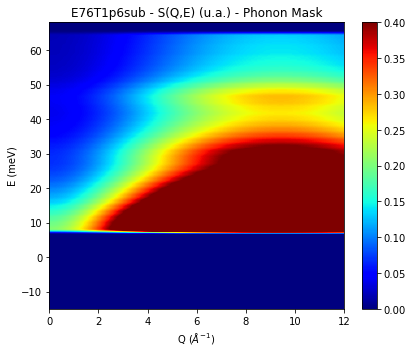

In [15]:
x= Q_arr
y= E_arr
z = np.array(S_mask)
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
#x = x.transpose()
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [min(x),max(x),min(y),max(y)], vmin=0,vmax = 0.40, cmap='jet')
#plt.contour(X, Y, Z,1000,vmin=0,vmax=0.84,cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E76T1p6sub - S(Q,E) (u.a.) - Phonon Mask')
plt.tight_layout()
plt.show()
fig.savefig("./figures/E76T1p6sub_mask.png")

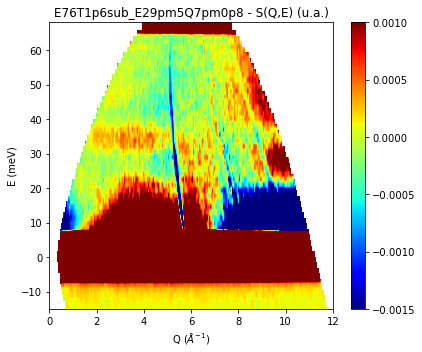

In [18]:
S_mask = np.array(S_mask)
S_arr1 = S_arr-S_mask/ratio.mean()

x= Q_arr
y= E_arr
z = S_arr1
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,12,-15,68], vmin=-0.0015,vmax = 0.001, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E76T1p6sub_E29pm5Q7pm0p8 - S(Q,E) (u.a.)')
plt.tight_layout()
plt.show()
#fig.savefig('./figures/sub_E76T1p6sub_1.png')

#### Q and E cuts on subtracted map

In [19]:
S_arr2D = S_arr1.reshape(len(Q_arr), len(E_arr))
S_arr2D = S_arr2D.transpose()
S_arr2D = np.flipud(S_arr2D)

In [20]:
S_E_int = []
for E_idx in range(S_arr2D.shape[0]):
    S_sum = 0
    for Q_idx in range(S_arr2D.shape[1]):
        if Q_arr[Q_idx]>2.2 and Q_arr[Q_idx]<3.8 :
            S_sum += S_arr2D[E_idx][Q_idx]
    S_E_int.append(S_sum)  
S_E_int = np.flip(S_E_int)

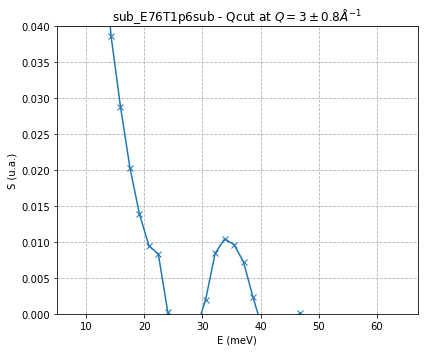

In [22]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('sub_E76T1p6sub - Qcut at $Q = 3 \pm 0.8 \AA ^{-1}$')  
plt.ylabel('S (u.a.)')
plt.xlabel('E (meV)')
plt.plot(E_arr, S_E_int, marker = 'x')
plt.xlim([5,67])
plt.ylim([0,0.04])
plt.tight_layout()
plt.show()
fig.savefig("./figures/sub_E76T1p6sub_Qcut.png")

In [23]:
S_arr2D_1 = np.rot90(S_arr2D, axes=(1, 0))
S_arr2D_1.shape

(227, 52)

In [24]:
S_Q_int = []
for Q_idx in range(S_arr2D_1.shape[0]):
    S_sum = 0
    for E_idx in range(S_arr2D_1.shape[1]):
        if E_arr[E_idx]>29 and E_arr[E_idx]<39 :
            S_sum += S_arr2D_1[Q_idx][E_idx]
    S_Q_int.append(S_sum)  
#S_Q_int = np.flip(S_Q_int)

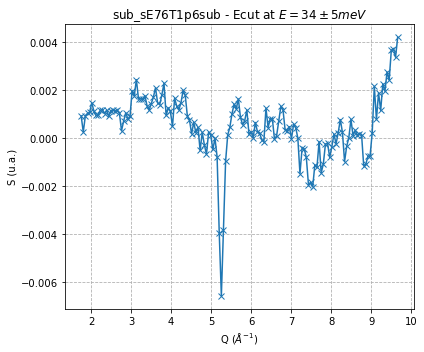

In [25]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('sub_sE76T1p6sub - Ecut at $E = 34 \pm 5 meV$')  
plt.ylabel('S (u.a.)')
plt.xlabel('Q ($\AA ^{-1}$)')
plt.plot(Q_arr, S_Q_int, marker = 'x')
#plt.xlim([5,67])
#plt.ylim([0,0.9])
plt.tight_layout()
plt.show()
fig.savefig("./figures/sub_E76T1p6sub_Ecut.png")